In [11]:
# Import libraries and check structure of kyphosis data
library("rpart")
library("rpart.plot")
library("randomForest")
str(kyphosis)
print(head(kyphosis))

Warning message:
"package 'randomForest' was built under R version 4.4.1"
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...
  Kyphosis Age Number Start
1   absent  71      3     5
2   absent 158      3    14
3  present 128      4     5
4   absent   2      5     1
5   absent   1      4    15
6   absent   1      2    16


n= 81 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 81 17 absent (0.79012346 0.20987654)  
   2) Start>=8.5 62  6 absent (0.90322581 0.09677419)  
     4) Start>=14.5 29  0 absent (1.00000000 0.00000000) *
     5) Start< 14.5 33  6 absent (0.81818182 0.18181818)  
      10) Age< 55 12  0 absent (1.00000000 0.00000000) *
      11) Age>=55 21  6 absent (0.71428571 0.28571429)  
        22) Age>=111 14  2 absent (0.85714286 0.14285714) *
        23) Age< 111 7  3 present (0.42857143 0.57142857) *
   3) Start< 8.5 19  8 present (0.42105263 0.57894737) *



Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error xerror    xstd
1 0.176471      0   1.00000 1.0000 0.21559
2 0.019608      1   0.82353 1.1765 0.22829
3 0.010000      4   0.76471 1.1765 0.22829


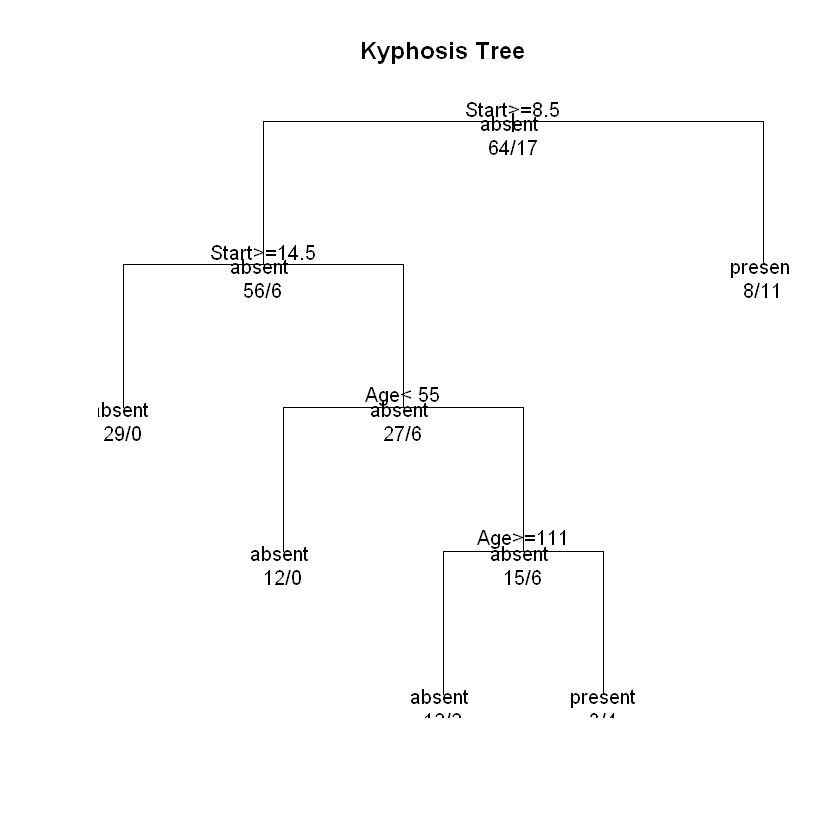

In [8]:
tree <- rpart(Kyphosis ~ ., data = kyphosis, method = "class")
print(tree)
plot(tree, uniform = T, main = "Kyphosis Tree")
text(tree, use.n = T, all = T)
printcp(tree)

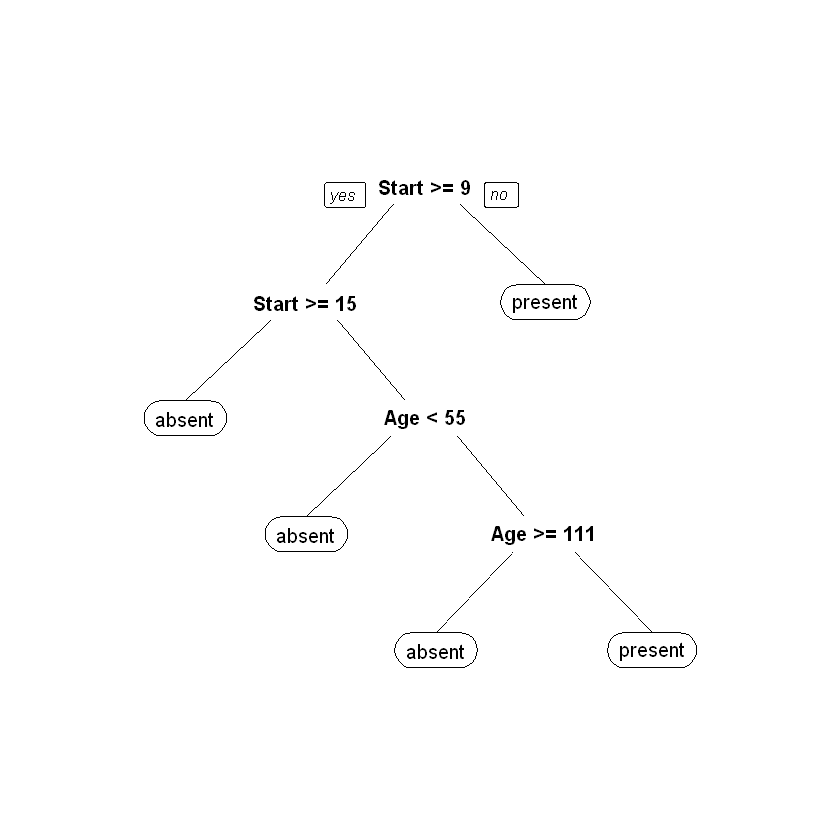

In [10]:
prp(tree)

In [12]:
rf.model <- randomForest(Kyphosis ~ ., data = kyphosis)
print(rf.model)


Call:
 randomForest(formula = Kyphosis ~ ., data = kyphosis) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 20.99%
Confusion matrix:
        absent present class.error
absent      59       5   0.0781250
present     12       5   0.7058824


In [14]:
print(rf.model$confusion)

        absent present class.error
absent      59       5   0.0781250
present     12       5   0.7058824
